In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
data= np.array([
    [2.5,2.4,1.2],
    [0.5,0.7,0.3],
    [2.2,2.9,1.4],
    [1.9,2.2,1.1],
    [3.1,3.0,1.7],
    [2.3,2.7,1.5],
    [2.0,1.6,0.9],
    [1.0,1.1,0.4],
    [1.5,1.6,0.8],
    [1.1,0.9,0.2]
])

In [ ]:
df=pd.DataFrame(data,columns=['x','y','z'])
df

,x,y,z
0,2.5,2.4,1.2
1,0.5,0.7,0.3
2,2.2,2.9,1.4
3,1.9,2.2,1.1
4,3.1,3.0,1.7
5,2.3,2.7,1.5
6,2.0,1.6,0.9
7,1.0,1.1,0.4
8,1.5,1.6,0.8
9,1.1,0.9,0.2


In [ ]:
standardized_data= (df-df.mean())/df.std()
standardized_data

,x,y,z
0,0.878745,0.578857,0.477697
1,-1.668342,-1.429422,-1.242013
2,0.496682,1.169527,0.859855
3,0.114619,0.342589,0.286618
4,1.642872,1.287661,1.433092
5,0.624036,0.933259,1.050934
6,0.241973,-0.366216,-0.095539
7,-1.031570,-0.956886,-1.050934
8,-0.394799,-0.366216,-0.286618
9,-0.904216,-1.193154,-1.433092


In [ ]:
cov_matrix=np.cov(standardized_data.T)
cov_matrix

array([[1.        , 0.92592927, 0.93688744],
       [0.92592927, 1.        , 0.98192228],
       [0.93688744, 0.98192228, 1.        ]])

In [ ]:
eig_vals,eig_vecs=np.linalg.eig(cov_matrix)

In [ ]:
sorted_indices=np.argsort(eig_vals)[::-1]
sorted_indices

array([0, 1, 2])

In [ ]:
eig_vecs_subset=eig_vecs[:,sorted_indices[:2]]
eig_vecs_subset

array([[ 0.57041595,  0.81767389],
       [ 0.57969966, -0.46779003],
       [ 0.58187108, -0.33553224]])

In [ ]:
reduced_data = standardized_data.to_numpy().dot(eig_vecs_subset)
reduced_df = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])
display(reduced_df)

,PC1,PC2
0,1.114772,0.287461
1,-2.502976,-0.278755
2,1.461615,-0.429478
3,0.430754,-0.162708
4,2.517452,0.260130
5,1.508478,-0.278933
6,-0.129861,0.401224
7,-1.754639,-0.043244
8,-0.604269,-0.055335
9,-2.041325,0.299640


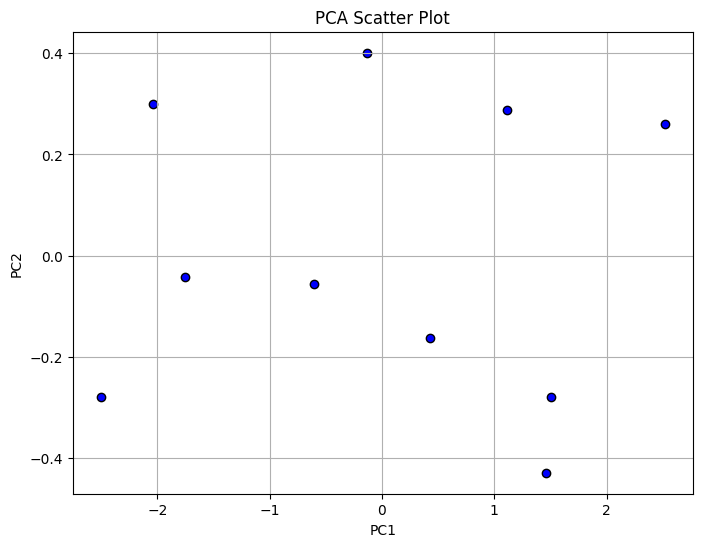

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(reduced_df['PC1'], reduced_df['PC2'], color='blue',edgecolor='k')
plt.title('PCA Scatter Plot')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()